# Classification Exercises

In [1]:
import pandas as pd
from pydataset import data
import split_scale

import sklearn.impute
import sklearn.model_selection
import sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

import acquire
import prepare

## Data Acquisition

## 1. Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data("iris")

* print the first 3 rows

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


* print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

* print the column names

In [5]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

* print the data type of each column

In [6]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


* print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 2. Read Table1_CustDetails the excel module dataset, Excel_Exercises.xlsx, into a dataframe, df_excel

In [8]:
df_excel = pd.read_excel("Spreadsheets_Exercises.xlsx")

* assign the first 100 rows to a new dataframe, df_excel_sample

In [9]:
df_excel_sample = df_excel.head(100)
df_excel_sample.shape

(100, 12)

* print the number of rows of your original dataframe

In [10]:
df_excel.shape

(7049, 12)

* print the first 5 column names

In [11]:
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

* print the column names that have a data type of object 

In [12]:
df_excel.select_dtypes(include="object").columns

Index(['customer_id', 'gender', 'partner', 'dependents', 'payment_type',
       'churn'],
      dtype='object')

* compute the range for each of the numeric variables.

In [13]:
df_excel.select_dtypes(exclude="object").apply(lambda col: col.max() - col.min())

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

## 3. Read the data from this google sheet into a dataframe, df_google

In [14]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

print the first 3 rows

In [15]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


print the number of rows and columns

In [16]:
df_google.shape

(891, 12)

print the column names

In [17]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

print the data type of each column

In [18]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


print the summary statistics for each of the numeric variables

In [19]:
df_google.select_dtypes(exclude="object").apply(lambda col: col.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


print the unique values for each of your categorical variables

In [20]:
df_google.select_dtypes(include="object").apply(lambda col: col.nunique(dropna = True))

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [21]:
for col in list(df_google.select_dtypes(include="object")):
    print(col)
    print('-------------')
    print(df_google[col].value_counts(dropna=False))
    print('-------------')

Name
-------------
Matthews, Mr. William John                      1
Garfirth, Mr. John                              1
Longley, Miss. Gretchen Fiske                   1
Lefebre, Miss. Ida                              1
Nankoff, Mr. Minko                              1
                                               ..
Lundahl, Mr. Johan Svensson                     1
Jalsevac, Mr. Ivan                              1
Pavlovic, Mr. Stefo                             1
Kalvik, Mr. Johannes Halvorsen                  1
Andersson, Mr. August Edvard ("Wennerstrom")    1
Name: Name, Length: 891, dtype: int64
-------------
Sex
-------------
male      577
female    314
Name: Sex, dtype: int64
-------------
Ticket
-------------
1601                7
347082              7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
341826              1
348124              1
STON/O2. 3101290    1
28213               1
PC 17601            1
Name: Ticket, Length: 681, dtype

# Data Preparation Exercises

## 1 Use the function defined in acquire.py to load the iris data.

In [22]:
import acquire

In [23]:
iris = acquire.get_iris_data()

Drop the species_id and measurement_id columns.

In [24]:
iris = iris.drop(columns=["species_id", "measurement_id"])

Rename the species_name column to just species.

In [25]:
iris = iris.rename(columns = {"species_name" : "species"})

Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder. How might this be useful?

The `inverse_transform` seems to be the opposite, and lets us reverse the effects of the encoder.

In [26]:
train, test = sklearn.model_selection.train_test_split(iris, random_state=123, train_size= .8)

In [27]:
le = LabelEncoder()

In [28]:
train['species'] = le.fit_transform(train.species)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
test['species'] = le.transform(test.species)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
# encoder = sklearn.preprocessing.OneHotEncoder()

# encoder.fit(train[["species"]])

# m = encoder.transform(train[["species"]]).todense()

# train = pd.concat([train, pd.DataFrame(m, columns=encoder.categories_[0], index=train.index)], axis = 1).drop(columns="species")

# m = encoder.transform(test[["species"]]).todense()

# test = pd.concat([test, pd.DataFrame(m, columns=encoder.categories_[0], index=test.index)], axis = 1).drop(columns="species")

Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [31]:
def drop_columns(df):
    return df.drop(columns=[
        "species_id",
        "measurement_id"
        
    ])

def rename_columns(df):
    return df.rename(columns = {"species_name" : "species"})

def encode_iris(train, test):
    encoder = sklearn.preprocessing.OneHotEncoder()

    encoder.fit(train[["species"]])

    m = encoder.transform(train[["species"]]).todense()

    train = pd.concat([train, pd.DataFrame(m, columns=encoder.categories_[0], index=train.index)], axis = 1).drop(columns="species")

    m = encoder.transform(test[["species"]]).todense()

    test = pd.concat([test, pd.DataFrame(m, columns=encoder.categories_[0], index=test.index)], axis = 1).drop(columns="species")
    
    return train, test

def prep_iris(df):
    df = drop_columns(df)
    df = rename_columns(df)
    train, test = sklearn.model_selection.train_test_split(df, random_state=123, train_size= .8)
    train, test = encode_iris(train, test)
    return train, test

## 2 Use the function you defined in acquire.py to load the titanic data set.

In [32]:
titanic = acquire.get_titanic_data()

In [33]:
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


Handle the missing values in the embark_town and embarked columns.

In [34]:
titanic.embark_town = titanic.embark_town.fillna(titanic.embark_town.value_counts().head(1).index[0])

In [35]:
titanic.embarked = titanic.embarked.fillna(titanic.embarked.value_counts().head(1).index[0])

Remove the deck column.

In [36]:
titanic = titanic.drop(columns="deck")

Use a label encoder to transform the embarked column.

In [37]:
train, test = sklearn.model_selection.train_test_split(titanic, random_state=123, train_size = .8)

In [38]:
encoder = sklearn.preprocessing.OneHotEncoder()

encoder.fit(train[["embarked"]])

m = encoder.transform(train[["embarked"]]).todense()

train = pd.concat([train, pd.DataFrame(m, columns=encoder.categories_[0], index=train.index)], axis = 1).drop(columns="embarked")

m = encoder.transform(test[["embarked"]]).todense()

test = pd.concat([test, pd.DataFrame(m, columns=encoder.categories_[0], index=test.index)], axis = 1).drop(columns="embarked")


Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?

This is beneficial because age and fare are now in a more comparable format with each other. 

This is not benefecial when the data is on the same scale, or there is only one X variable

In [39]:
X_train = train[["age", "fare"]]
X_test = test[["age", "fare"]]

scaler, train_scaled, test_scaled = split_scale.min_max_scaler(X_train, X_test)

In [40]:
train["age"] = train_scaled["age"]
train["fare"] = train_scaled["fare"]
test["age"] = test_scaled["age"]
test["fare"] = test_scaled["fare"]

Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.

In [41]:
test.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,class,embark_town,alone,C,Q,S
172,172,1,3,female,0.003891,1,1,0.044979,Third,Southampton,0,0.0,0.0,1.0
524,524,0,3,male,NaN,0,0,0.029206,Third,Cherbourg,1,1.0,0.0,0.0
452,452,0,1,male,0.455253,0,0,0.112112,First,Cherbourg,1,1.0,0.0,0.0
170,170,0,1,male,0.937743,0,0,0.135342,First,Southampton,1,0.0,0.0,1.0
620,620,0,3,male,0.408560,1,0,0.058396,Third,Cherbourg,0,1.0,0.0,0.0


In [42]:
imputer = sklearn.impute.SimpleImputer(strategy = "mean")

imputer.fit(train[["age"]])

train.age = imputer.transform(train[["age"]])
test.age = imputer.transform(test[["age"]])

Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

# Exploration Exercises

In [43]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
iris = acquire.get_iris_data()

In [45]:
train, test = split_scale.split_my_df(iris)

In [46]:
train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
130,3,131,7.4,2.8,6.1,1.9,virginica
119,3,120,6.0,2.2,5.0,1.5,virginica
29,1,30,4.7,3.2,1.6,0.2,setosa
0,1,1,5.1,3.5,1.4,0.2,setosa
62,2,63,6.0,2.2,4.0,1.0,versicolor


Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis is the variable name, the y-axis is the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [74]:
melt = pd.melt(train[["species_name", "sepal_length", "sepal_width", "petal_length", "petal_width"]], "species_name", var_name="measurement")

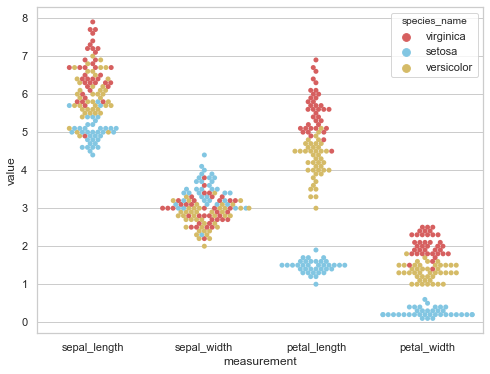

In [76]:
plt.figure(figsize=(8,6))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(
    x="measurement",
    y="value",
    hue="species_name",
    palette=["r", "c", "y"],
    data=melt
)
# p.set(yscale="log")
plt.show()

In [48]:
train["sepal_area"] = train["sepal_length"] * train["sepal_width"]
train["petal_area"] = train["petal_length"] * train["petal_width"]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Create 4 subplots (2 rows x 2 columns) of scatterplots

* sepal_length x sepal_width
* petal_length x petal_width
* sepal_area x petal_area
* sepal_length x petal_length
* Make your figure size 14 x 8. What are your takeaways?

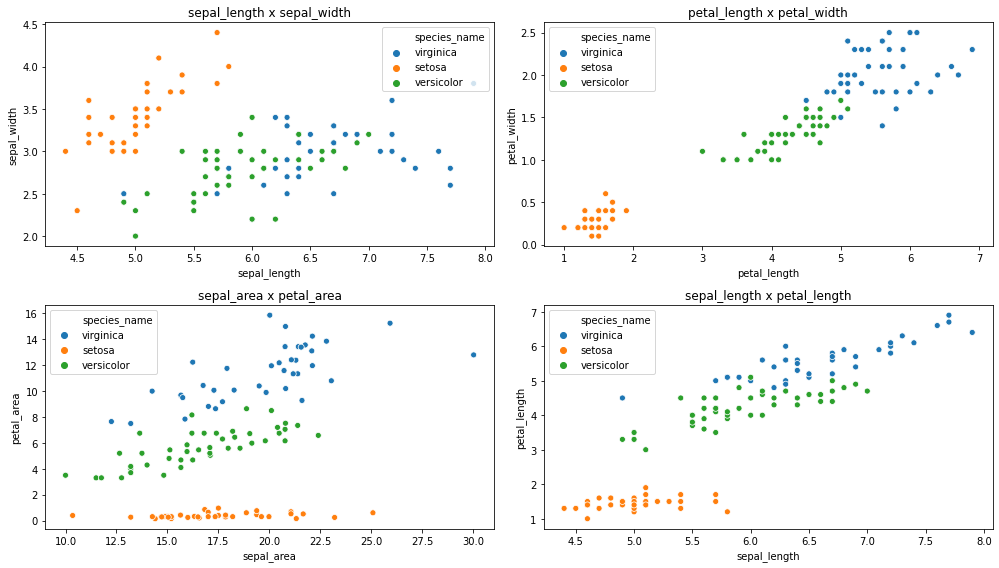

In [63]:
figure, axes = plt.subplots(2,2, figsize=(14, 8))

sns.scatterplot(x="sepal_length", y="sepal_width", hue="species_name", data=train, ax=axes[0,0])
axes[0,0].set_title("sepal_length x sepal_width")
sns.scatterplot(x="petal_length", y="petal_width", hue="species_name", data=train, ax=axes[0,1])
axes[0,1].set_title("petal_length x petal_width")
sns.scatterplot(x="sepal_area", y="petal_area", hue="species_name", data=train, ax=axes[1,0])
axes[1,0].set_title("sepal_area x petal_area")
sns.scatterplot(x="sepal_length", y="petal_length", data=train, hue="species_name", ax=axes[1,1])
axes[1,1].set_title("sepal_length x petal_length")
figure.tight_layout()
plt.show()

Key-Takeaways:

* Petal Length and Petal Width are highly correlated with each other
* There is a bit of a correlation between sepal_legnth and petal_length
* There seems to be no correlation between sepal_length and sepal_width
* When we add the hue function - we do see that if we are trying to identify species names, then petal length and petal width would likely be the best features. Sepal area and petal area also seem like good features. 


Create a heatmap of each variable layering correlation coefficient on top.

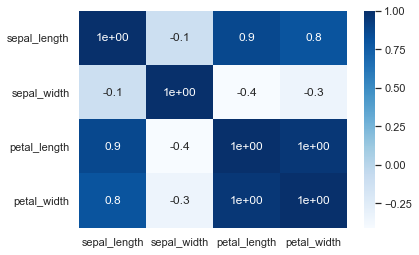

In [79]:
sns.heatmap(train[["sepal_length", "sepal_width", "petal_length", "petal_width"]].corr(), annot=True, cmap="Blues", fmt='.0')

Create a scatter matrix visualizing the interaction of each variable

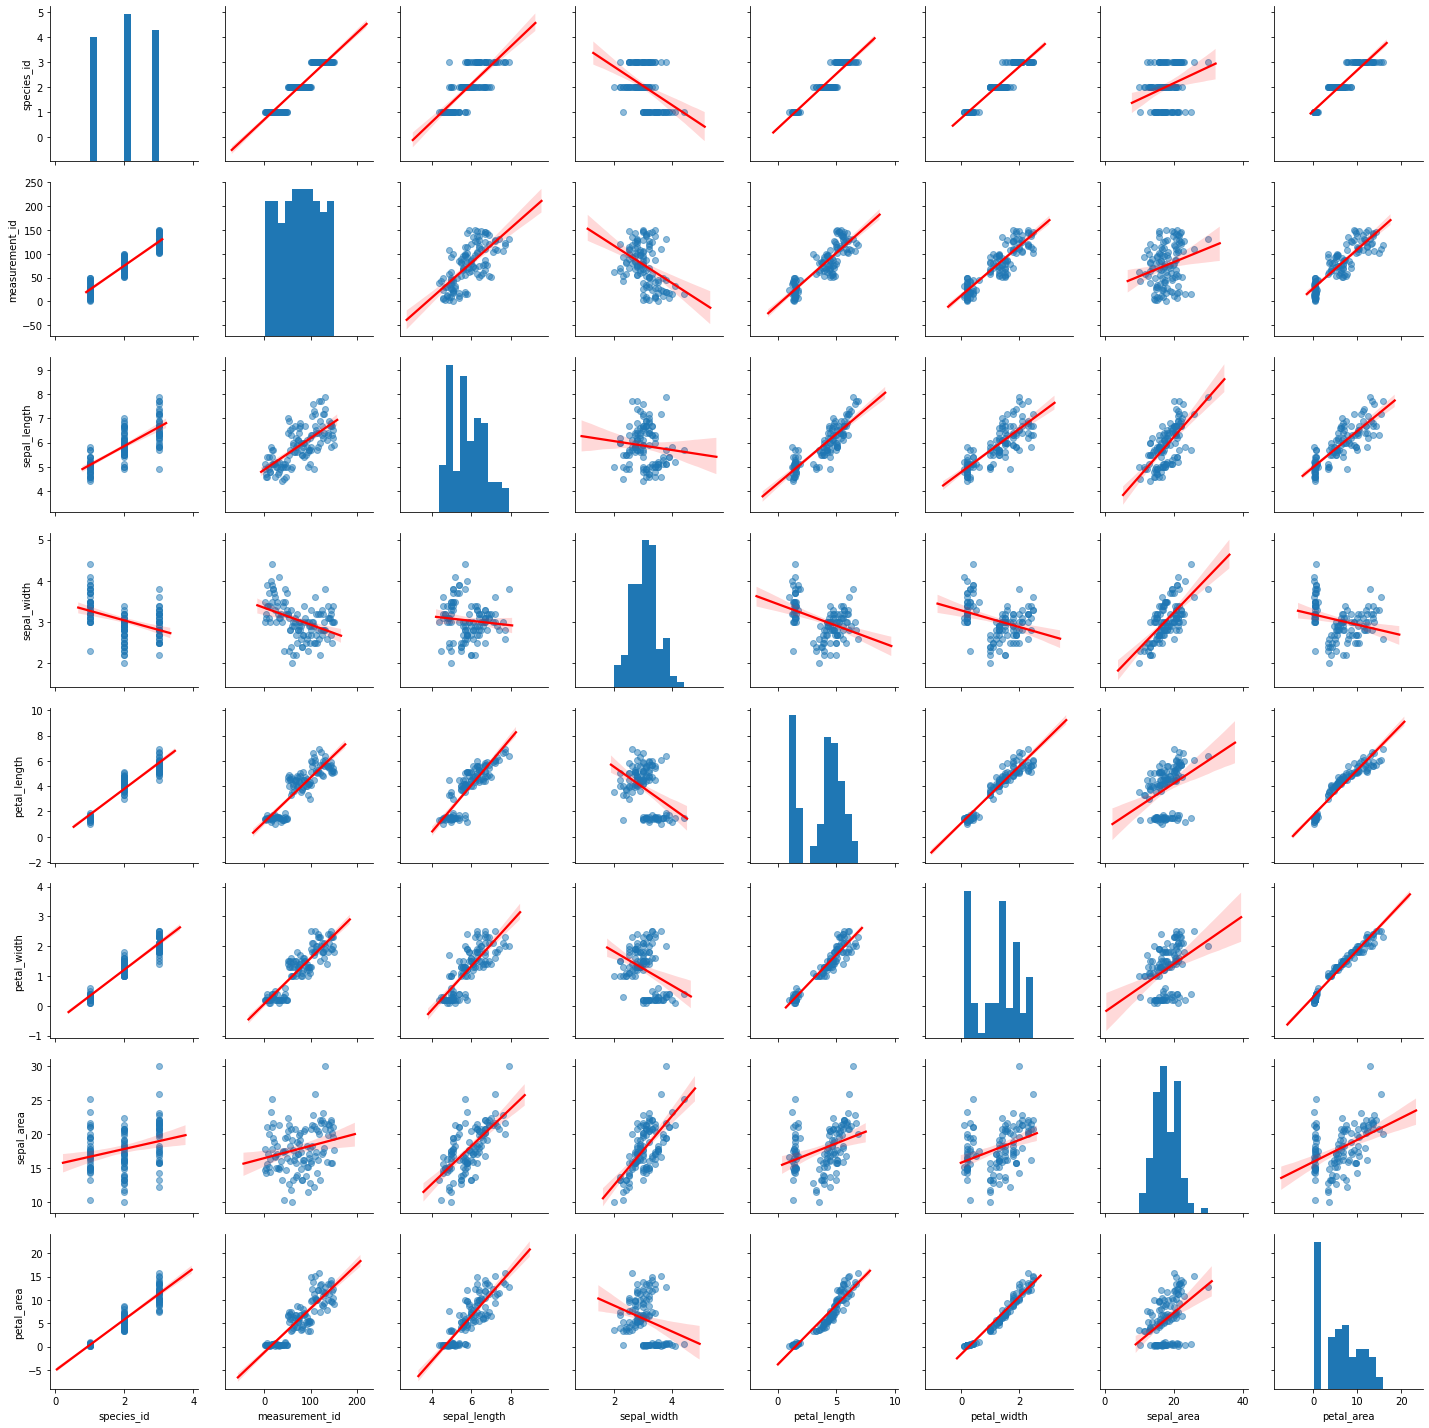

In [56]:
sns.pairplot(train, hue=None, kind="reg", plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})

Is the sepal length significantly different in virginica compared to versicolor? Run an experiment to test this.

* must include null hypothesis, alternative hypothesis, t-test, results, summary
* $H_0$: the difference in sepal length between virginica and versicolor is insignificant.
* $H_a$: the difference in sepal length between virginica and versicolor is substantial.

* We will test if the sepal length of virginica is significantly different than that of the versicolor.
* If there is difference, then variable sepal_length is a good choice to keep as a feature.
* We can use a t-test here, as sepal_length is somewhat normally distributed.

In [58]:
train.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name,sepal_area,petal_area
130,3,131,7.4,2.8,6.1,1.9,virginica,20.72,11.59
119,3,120,6.0,2.2,5.0,1.5,virginica,13.20,7.50
29,1,30,4.7,3.2,1.6,0.2,setosa,15.04,0.32
0,1,1,5.1,3.5,1.4,0.2,setosa,17.85,0.28
62,2,63,6.0,2.2,4.0,1.0,versicolor,13.20,4.00


In [60]:
import scipy as sp 
import numpy as np

sp.stats.ttest_ind(
    train[train.species_name == "virginica"].sepal_length.dropna(),
    train[train.species_name == "versicolor"].sepal_length.dropna())

Ttest_indResult(statistic=4.980132945849142, pvalue=3.52657684383184e-06)

Selpal Length is significantly different in both species, which means that it can be a good identifer for species, and as such, we can keep it as a feature.